In [1]:
### Run this cell before continuing. 
library(tidyverse)
library(repr)
library(readxl)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [7]:
#load data set
#student_data <- read_delim("data/student-por.csv", delim = ';')
student_math=read.table("data/student-mat.csv",sep=";",header=TRUE)
student_port=read.table("data/student-por.csv",sep=";",header=TRUE)

student_data=merge(student_port,student_math,by=c("school","sex","age","address","famsize","Pstatus","famsup","Medu","Fedu","Mjob","Fjob","failures","higher"))
student_data

student_filter <- filter(student_port, higher == "no")
student_filter

school,sex,age,address,famsize,Pstatus,famsup,Medu,Fedu,Mjob,⋯,famrel.y,freetime.y,goout.y,Dalc.y,Walc.y,health.y,absences.y,G1.y,G2.y,G3.y
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
GP,F,15,R,GT3,T,yes,2,2,at_home,⋯,4,3,1,1,1,2,8,14,13,13
GP,F,15,R,GT3,T,yes,2,4,services,⋯,4,3,2,1,1,5,2,10,9,8
GP,F,15,R,GT3,T,yes,3,4,services,⋯,4,3,2,1,1,5,2,12,12,11
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
MS,M,19,R,GT3,T,no,1,1,other,⋯,4,3,2,1,3,5,0,6,5,0
MS,M,19,R,GT3,T,no,1,1,other,⋯,4,3,2,1,3,5,0,6,5,0
MS,M,19,R,GT3,T,yes,1,1,other,⋯,4,4,4,3,3,5,4,8,8,8


school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
GP,M,17,U,GT3,T,2,1,other,other,⋯,4,5,1,1,1,3,0,9,9,10
GP,F,19,U,GT3,T,0,1,at_home,other,⋯,3,4,2,1,1,5,0,9,10,11
GP,F,18,U,GT3,T,2,1,services,other,⋯,5,4,5,1,3,5,10,10,9,8
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
MS,F,18,U,GT3,T,1,2,at_home,at_home,⋯,4,1,1,1,1,4,0,11,11,12
MS,F,19,R,GT3,A,1,1,at_home,at_home,⋯,3,5,4,1,4,1,0,8,0,0
MS,M,18,R,LE3,T,1,2,at_home,services,⋯,4,3,3,2,3,3,3,9,10,10


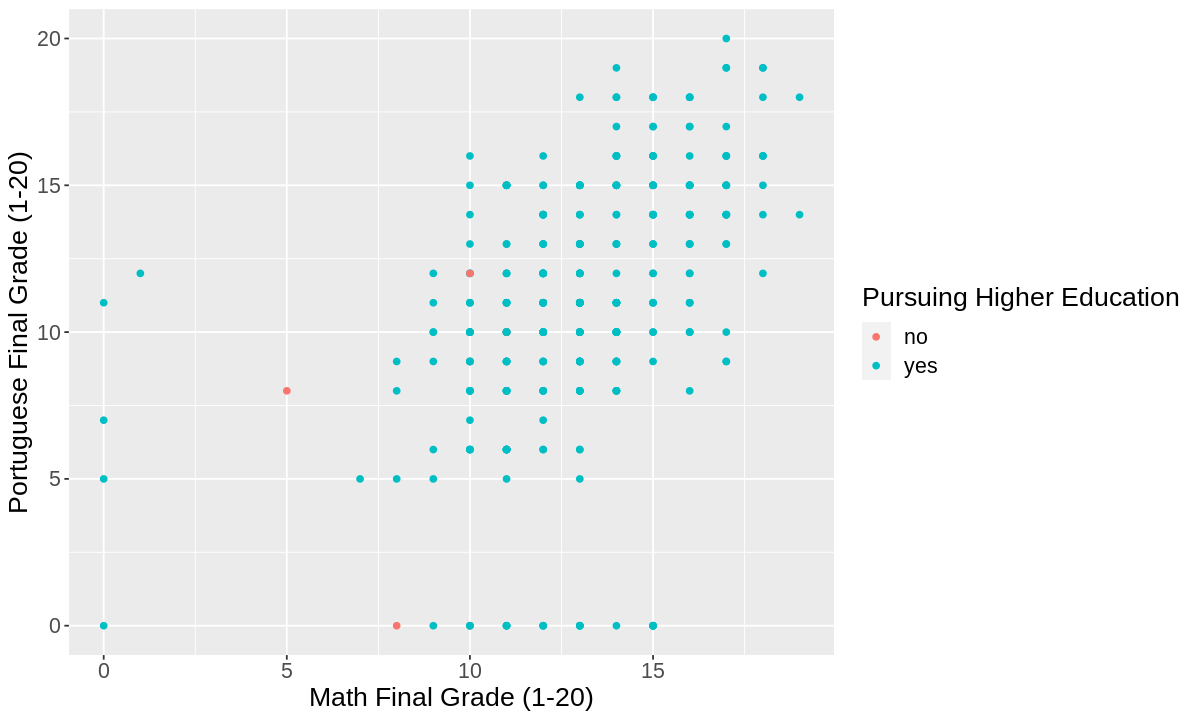

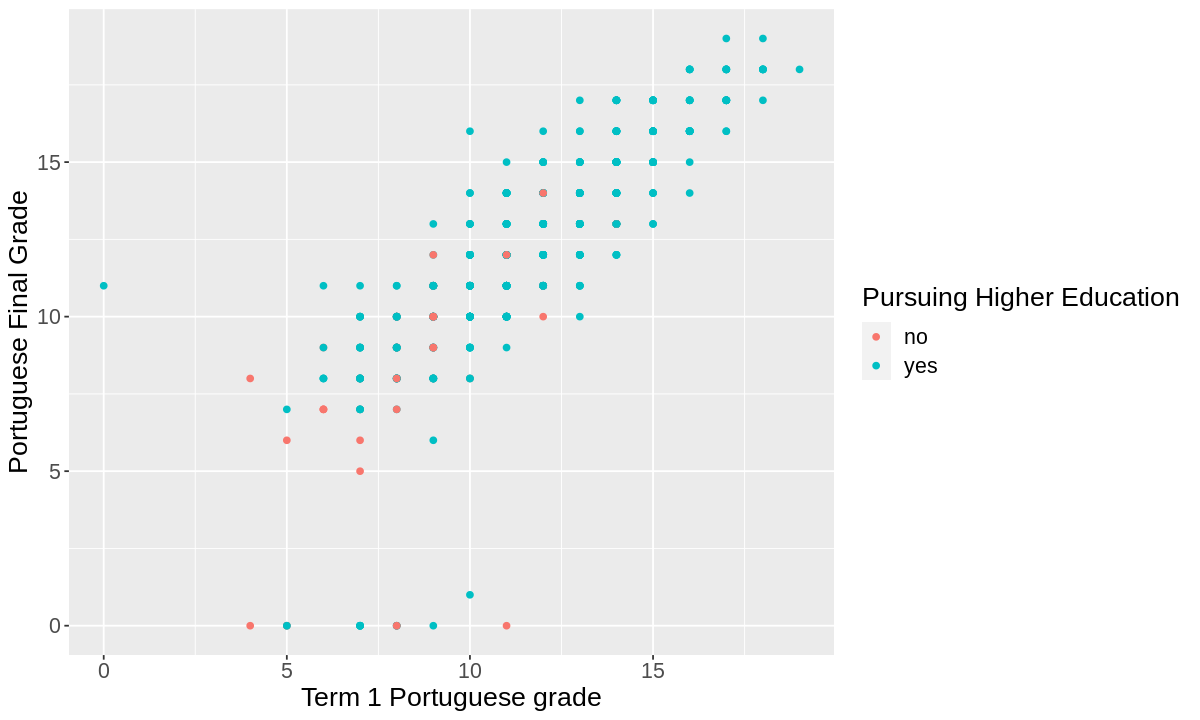

In [33]:
options(repr.plot.width=10, repr.plot.height=6)
student_higher_plot <- student_data %>%
                select(G3.x, G3.y, higher) %>%
                ggplot(aes(x = G3.x, y = G3.y, colour = higher)) + 
                geom_point()+
                labs(x = "Math Final Grade (1-20)", y = "Portuguese Final Grade (1-20)", colour = "Pursuing Higher Education")+
                theme(text = element_text(size=16))      
student_higher_plot

student_por_plot <- d2 %>%
                select(G1, G3, higher) %>%
                ggplot(aes(x = G1, y = G3, colour = higher)) + 
                geom_point()+
                labs(x = "Term 1 Portuguese grade", y = "Portuguese Final Grade", colour = "Pursuing Higher Education")+
                theme(text = element_text(size=16))      
student_por_plot


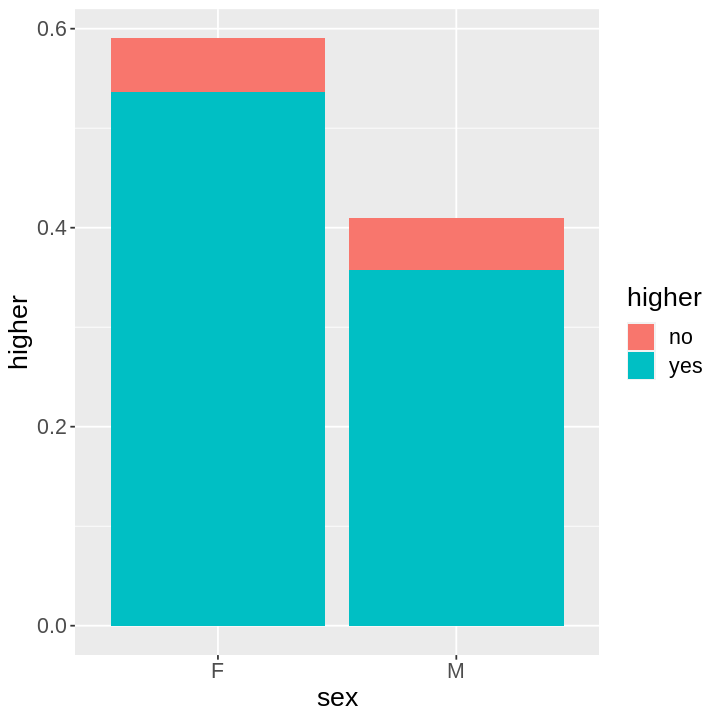

In [23]:
options(repr.plot.width=6, repr.plot.height=6)
student_gender <- student_port %>%
                select(sex, higher) %>%
                ggplot(aes(x=sex, y=higher))+
                geom_bar(aes(y = ..count../sum(..count..), fill = higher))+
                theme(text = element_text(size=16))
student_gender

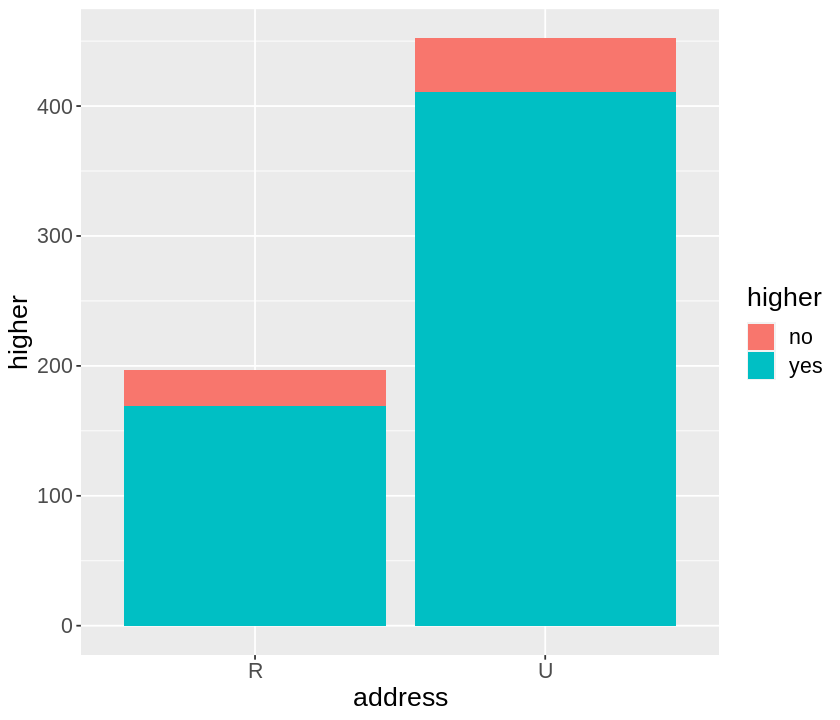

In [24]:
options(repr.plot.width=7, repr.plot.height=6)
student_address <- student_port %>%
                select(address, higher) %>%
                ggplot(aes(x=address, y=higher))+
                geom_bar(aes(y = ..count.., fill = higher))+
                theme(text = element_text(size=16))
student_address



`summarise()` regrouping output by 'address' (override with `.groups` argument)



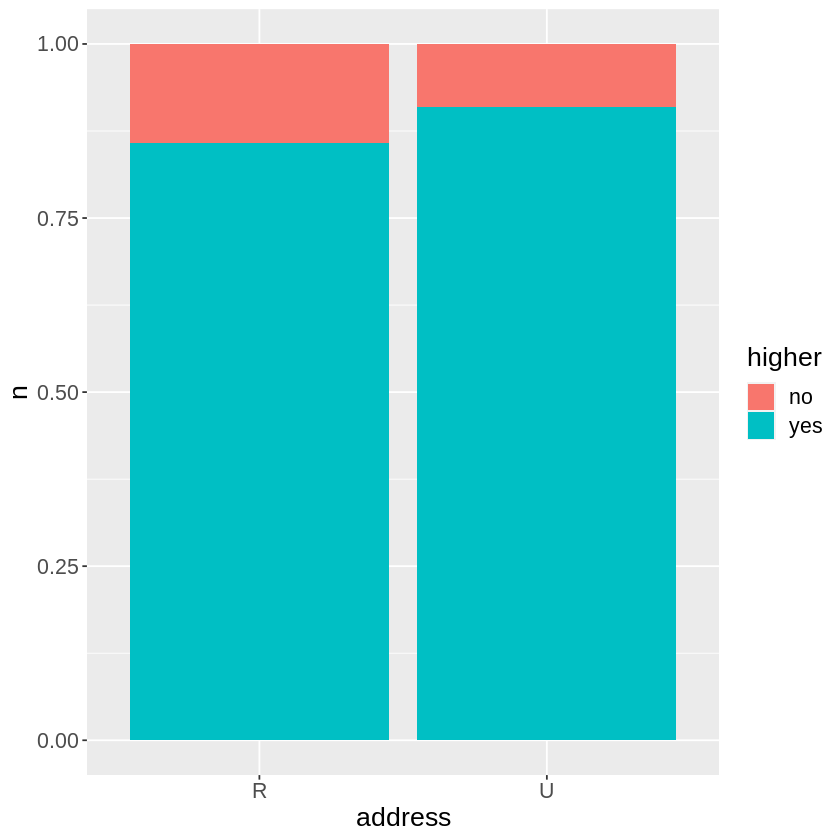

In [14]:
address_n_higher <- student_port %>%
            select(address, higher)%>%
            group_by(address, higher)%>%
            summarize(n = n())
address_plot <- ggplot(address_n_higher, aes(x = address, y = n, fill = higher)) +
                    geom_bar(stat = "identity", position = "fill")+
                theme(text = element_text(size=16))
address_plot

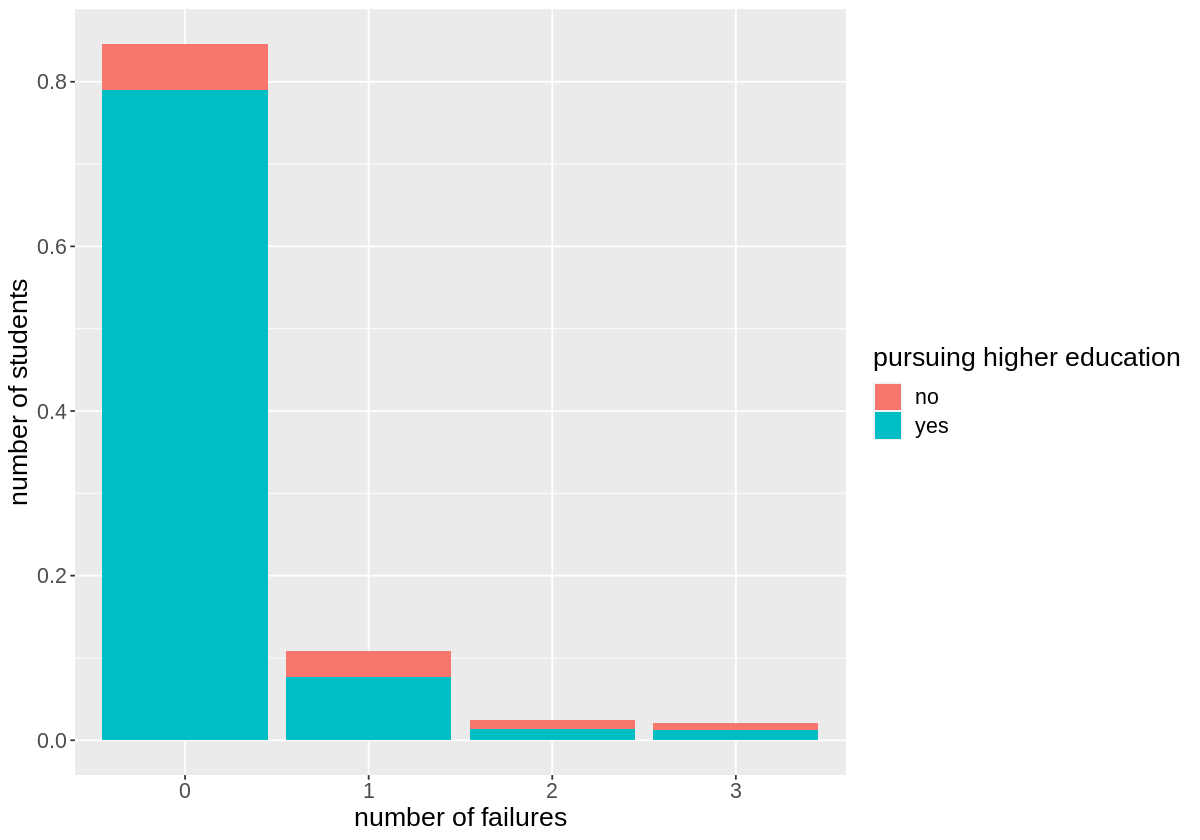

In [32]:
options(repr.plot.width=10, repr.plot.height=7)
student_failures <- student_port %>%
                select(failures, higher) %>%
                ggplot(aes(x=as.factor(failures), y=higher))+
                geom_bar(aes(y = ..count../sum(..count..), fill = higher))+
                labs(y = "number of students", x = "number of failures", fill = "pursuing higher education")+
                theme(text = element_text(size=16))
student_failures

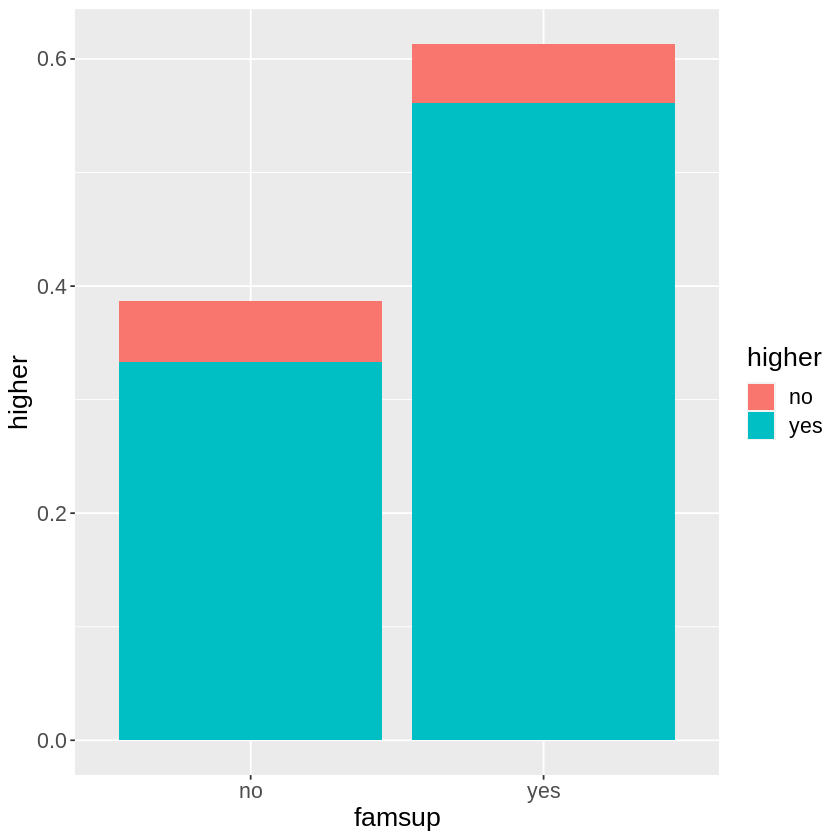

In [17]:
family_support <- student_port %>%
                select(famsup, higher) %>%
                ggplot(aes(x=famsup, y=higher))+
                geom_bar(aes(y = ..count../sum(..count..), fill = higher))+
                theme(text = element_text(size=16))
family_support